In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data=pd.read_excel("path/ANZ/ANZ synthesised transaction dataset.xlsx")

In [3]:
#duplicate data check
dupli=[i for i in data.duplicated() if i is True]
print(dupli)

[]


In [4]:
#dropping irrelevant columns
data=data.drop(['long_lat','merchant_id','merchant_code','transaction_id','country','currency','first_name','merchant_long_lat'],axis=1)

In [5]:
data.head(3)

,status,card_present_flag,bpay_biller_code,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement
0,authorized,1.0,NaN,ACC-1598451071,POS,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit
1,authorized,0.0,NaN,ACC-1598451071,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit
2,authorized,1.0,NaN,ACC-1222300524,POS,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit


In [6]:
#Average Transaction Amount
data['amount'].mean()

187.93358797641767

How many transactions do customers make each month, on average?

In [7]:
Months = {'08':'Aug','09':'Sep','10':'Oct'}
s = list(data['date'])
t = [str(i).split('-')[1] for i in s]
month = pd.Series([Months[i] for i in t])

In [8]:
data['month']=month

In [9]:
s=list(data['extraction'])
t= [str(i).split('T')[1] for i in s]
s=[i.split('.')[0] for i in t]
time = [int(i.split(':')[0]) for i in s]
hour=pd.Series(time)
data['hour']=hour

In [10]:
s = list(data['date'])
t = [ [str(i).split('-')[2].split(' ')[0], str(i).split('-')[1]] for i in s]
week_Aug = {1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon',0:'Tue'}
week_Sep = {1:'Sat',2:'Sun',3:'Mon',4:'Tue',5:'Wed',6:'Thu',0:'Fri'}
week_Oct = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat',0:'Sun',}
k=0
day=[]
for i in t:
    date, month = int(i[0]), i[1]
    if month=='08':
        r=date%7
        day.append(week_Aug[r])
        if k<6:
            k=k+1
        else:
            k=0
    if month=='09':
        r=date%7
        day.append(week_Sep[r])
        if k<6:
            k=k+1
        else:
            k=0
    if month=='10':
        r=date%7
        day.append(week_Oct[r])
        if k<6:
            k=k+1
        else:
            k=0
day=pd.Series(day)
data['Day']=day

In [11]:
data.head(3)

,status,card_present_flag,bpay_biller_code,account,txn_description,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,customer_id,movement,month,hour,Day
0,authorized,1.0,NaN,ACC-1598451071,POS,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,CUS-2487424745,debit,Aug,1,Wed
1,authorized,0.0,NaN,ACC-1598451071,SALES-POS,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,CUS-2487424745,debit,Aug,1,Wed
2,authorized,1.0,NaN,ACC-1222300524,POS,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,CUS-2142601169,debit,Aug,1,Wed


In [12]:
def avg_trans(month):
    month_data=data[data['month']==month]
    no_of_transactions=len(month_data.index)
    no_of_users=len(month_data['account'].unique())
    avg_transactions=no_of_transactions/no_of_users
    return avg_transactions

In [13]:
Aug=avg_trans('Aug')

In [14]:
Sept=avg_trans('Sep')
Oct=avg_trans('Oct')

In [15]:
print("Average Transactions\nAug ",Aug,"\nSep",Sept,"\nOct",Oct)

Average Transactions
Aug  39.43 
Sep 40.13 
Oct 40.87


In [16]:
def avg_trans(hr):
    day_data=data[data['hour']==hr]
    no_of_transactions=len(day_data.index)
    no_of_users=len(day_data['account'].unique())
    if(no_of_users!=0):
        avg_transactions=no_of_transactions/no_of_users
    else:
        avg_transactions=0
    return avg_transactions
for i in range(24):
    print(i,": ",int(np.round_(avg_trans(i))))

0 :  2
1 :  3
2 :  3
3 :  4
4 :  5
5 :  5
6 :  4
7 :  5
8 :  6
9 :  11
10 :  7
11 :  10
12 :  6
13 :  6
14 :  8
15 :  8
16 :  6
17 :  9
18 :  5
19 :  6
20 :  7
21 :  8
22 :  5
23 :  5


In [17]:
def avg_trans(day):
    week_data=data[data['Day']==day]
    no_of_transactions=len(week_data.index)
    no_of_users=len(week_data['account'].unique())
    avg_transactions=no_of_transactions/no_of_users
    return avg_transactions
Week=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
for i in Week:
    print(i,": ",int(np.round_(avg_trans(i))))

Sun :  16
Mon :  14
Tue :  15
Wed :  21
Thu :  18
Fri :  21
Sat :  17


In [18]:
new_data=data.groupby('Day')
new_data['amount'].mean()

Day
Fri    249.353517
Mon    373.221000
Sat     54.419286
Sun     53.015845
Thu    184.010422
Tue    221.576456
Wed    195.215570
Name: amount, dtype: float64

In [19]:
new_data=data.groupby(['Day','hour'])
day_hour=np.round_(new_data['amount'].mean())
Week=['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
for i in Week:
    print(day_hour[i],sep='\t')

hour
0      25.0
1      85.0
2      42.0
3     105.0
4      35.0
5     123.0
6      74.0
7      59.0
8      49.0
9      47.0
10     56.0
11     41.0
12     42.0
13     38.0
14    118.0
15     39.0
16     48.0
17     36.0
18     70.0
19     32.0
20     41.0
21     40.0
22     48.0
23     46.0
Name: amount, dtype: float64
hour
0       23.0
1       20.0
2      135.0
3       49.0
4      123.0
5       42.0
6       78.0
7       61.0
8       41.0
9       31.0
10      39.0
11    1003.0
12     408.0
13    1219.0
14     644.0
15     192.0
16     116.0
17    1095.0
18      49.0
19      74.0
20      50.0
21      47.0
22      31.0
23      58.0
Name: amount, dtype: float64
hour
0      22.0
1      29.0
2      64.0
3      48.0
4      72.0
5      62.0
6      42.0
7      56.0
8      48.0
9      41.0
10     60.0
11    336.0
12    847.0
13    429.0
14    252.0
15    171.0
16    374.0
17    728.0
18     34.0
19     65.0
20     81.0
21     90.0
22     58.0
23     63.0
Name: amount, dtype: float64
hour
0    

In [20]:
import seaborn as sns

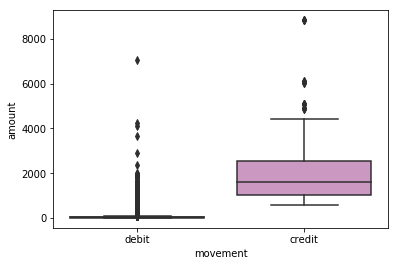

In [21]:
sns.boxplot(x='movement', y='amount',data=data,palette='cubehelix')

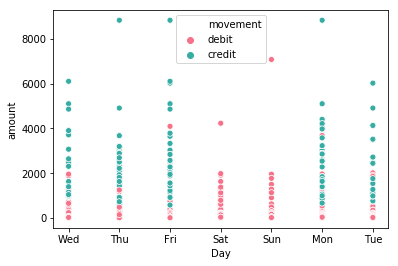

In [22]:
sns.scatterplot(x='Day',y='amount',hue='movement',palette='husl',data=data)

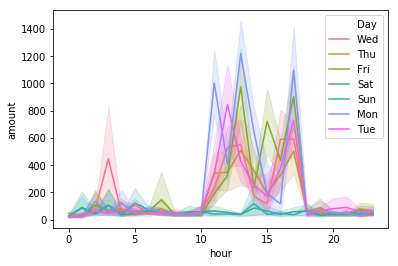

In [23]:
sns.lineplot(x='hour',y='amount',hue='Day',data=data,palette='husl')

In [24]:
data.corr()

,card_present_flag,balance,age,amount,hour
card_present_flag,1.000000,0.005925,-0.008405,-0.002074,-0.004132
balance,0.005925,1.000000,0.199329,0.059178,0.013898
age,-0.008405,0.199329,1.000000,0.029980,-0.000568
amount,-0.002074,0.059178,0.029980,1.000000,0.032348
hour,-0.004132,0.013898,-0.000568,0.032348,1.000000


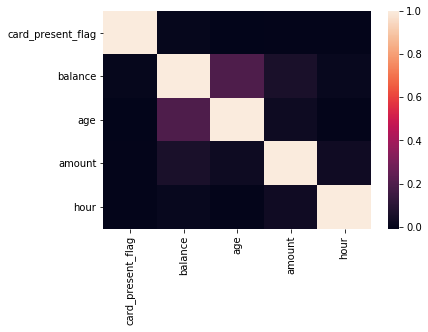

In [25]:
sns.heatmap(data.corr())